In [ ]:
#5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

#4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

#3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

#2 - They recorder the EEG from the area where the tumor was located

#1 - Recording of seizure activity



In [26]:
import pandas as pd
import numpy as np
df=pd.read_csv('Epileptic Seizure Recognition.csv')
df=df.drop('Unnamed',axis=1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [2]:
df['y'].unique()

array([4, 1, 5, 2, 3], dtype=int64)

In [3]:
df.shape

(11500, 179)

In [15]:
X=df.loc[:,["X38","X31","X33","X27","X36","X28","X21","X30","X40","X51","X2","X39","X13","X70","X72","X77","X81"]]
Y=df['y']
print(X.shape)
print()
print(Y.shape)

(11500, 17)

(11500,)


In [ ]:
Y[Y>1]=0
Y

<AxesSubplot:xlabel='y', ylabel='count'>

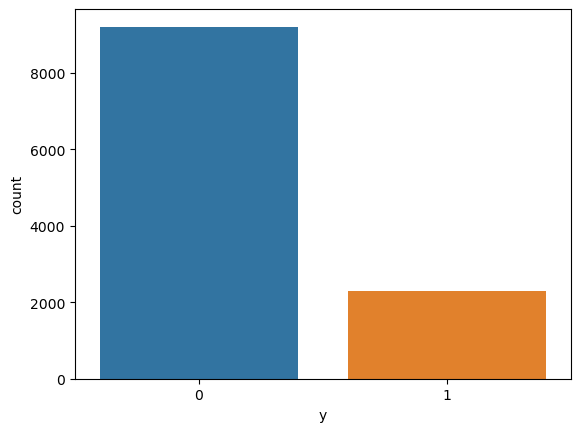

In [6]:
import seaborn as sns
sns.countplot(x=df["y"])

In [36]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X=scalar.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [10]:
pred=knn.predict(X_test)
res=pd.DataFrame({'Actual':Y_test,'predicted':pred})
res.head()

C:\Users\jothe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Actual,predicted
2663,0,0
8871,1,1
8684,1,0
2061,1,1
7258,0,0


In [11]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2760
           1       0.96      0.71      0.81       690

    accuracy                           0.94      3450
   macro avg       0.95      0.85      0.89      3450
weighted avg       0.94      0.94      0.93      3450



In [12]:
import matplotlib.pyplot as plt

In [19]:
#dont use standard scalar
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [20]:
feature_importances=pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance')
feature_importances

,importance
X33,0.038324
X81,0.040061
X30,0.041929
X13,0.044743
X40,0.045340
X31,0.045541
X27,0.048565
X70,0.051441
X72,0.053013
X51,0.056659


In [21]:
from sklearn import metrics
pred1=rf.predict(X_test)
print(metrics.accuracy_score(Y_test,pred1)*100)

95.3913043478261


In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini",max_depth=25,random_state=100)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=25, random_state=100)

In [23]:
pred2=dt.predict(X_test)
print(metrics.accuracy_score(Y_test,pred2)*100)

93.3623188405797


In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [25]:
pred3=gnb.predict(X_test)
print(metrics.accuracy_score(Y_test,pred3))

0.9408695652173913


In [35]:
X=df.loc[:,["X38","X31","X33","X27","X36","X28","X21","X30","X40","X51","X2","X39","X13","X70","X72","X77","X81"]].values
Y=df['y'].values

In [ ]:
from sklearn.svm import SVC
svc=SVC(C=.1, kernel='poly', gamma=1)
svc.fit(X_train,Y_train)

In [41]:
from sklearn import metrics
pred5=svc.predict(X_test)
print(metrics.accuracy_score(Y_test,pred5))

0.24579710144927536


In [11]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [12]:
pred4=log.predict(X_test)
print(metrics.accuracy_score(Y_test,pred4))

0.802608695652174


In [11]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=400,solver='sgd',random_state=0)
mlp.fit(X_train,Y_train)

MLPClassifier(max_iter=400, random_state=0, solver='sgd')

In [12]:
pred6=mlp.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred6))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2760
           1       0.92      0.83      0.87       690

    accuracy                           0.95      3450
   macro avg       0.94      0.91      0.92      3450
weighted avg       0.95      0.95      0.95      3450



In [70]:
data=pd.read_csv('Epileptic Seizure Recognition.csv')
data=data.drop('Unnamed',axis=1)

In [72]:
new_input=data.iloc[2061:2062,:179]
new_input

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
2061,-249,-404,-421,-294,-161,-67,0,107,259,318,...,-242,-220,-142,-32,68,51,-33,-208,-379,1


In [73]:
new_input[new_input<0]=0
new_input

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
2061,0,0,0,0,0,0,0,107,259,318,...,0,0,0,0,68,51,0,0,0,1


In [74]:
a=df.iloc[:,:178]
b=df['y']
b[b>1]=0


In [75]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.30,random_state=1)


In [76]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini",max_depth=25,random_state=100)
dt.fit(a_train,b_train)

DecisionTreeClassifier(max_depth=25, random_state=100)

In [78]:
inp=new_input.drop('y',axis=1)
print(inp.shape)
predict=dt.predict(inp)
if(predict==1):
    print("There is signal of seizure")
else:
    print("There is no sign for seizure")

(1, 178)
There is signal of seizure
